# Identify:

Please fill-in your ID in the following cell, **only id numbers, no names!**


In [1]:
id1 = "318510070"
id2 = "206073124"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

Uncomment in case two students are doing the assignment together:

In [3]:
df = pd.DataFrame([id1,id2])

In [4]:
df.to_clipboard(index=False,header=False)

---

----

In [5]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/avocado.csv'
data = pd.read_csv(url)
data.tail()

,Unnamed: 0,Date,AveragePrice,total_sold,small_sold,large_sold,sma,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,04/02/2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,28/01/2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,21/01/2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,14/01/2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,07/01/2018,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [6]:
data.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
total_sold      float64
small_sold      float64
large_sold      float64
sma             float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

# Q1 

#### We can use GroupBay or Pivot Table to get the result

In [7]:
a1 = data.groupby(["region","year"])[["total_sold"]].sum()
a1

total_sold
region           year             
Albany           2015   4029896.43
                 2016   5264335.59
                 2017   5231581.78
                 2018   1541986.17
Atlanta          2015  23231698.12
...                            ...
West             2018  92477085.01
WestTexNewMexico 2015  41523998.11
                 2016  43807431.60
                 2017  47389589.29
                 2018  11800820.78

[216 rows x 1 columns]

# Q2

####  We will use the Loc command to create the df and then use len to show the rows number

In [8]:
b1 = data.loc[(data.region == "Albany") & (data.year == 2016)].reset_index()
numrows = b1.index
len(numrows)

104

# Q3

#### show the average

In [9]:
b1["total_sold"].mean()

50618.61144230772

# Q4

#### We will turn the column "Date" into date time and add a column only with the month value ,then we take all the values from month 9 in the column "month" and sum them.


In [10]:
b1["Date"] = pd.to_datetime(b1["Date"])
b1['month'] = pd.DatetimeIndex(b1.Date).month
d1 = b1.loc[(b1.month == 9)]
d1["Total Bags"].sum()

35000.31

# Q5 

#### We will use the GroupBay command to take the desired columns and then the caplot for a convenient visual display

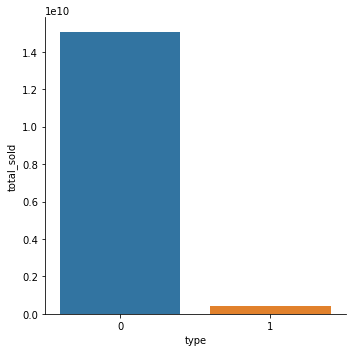

In [36]:
e1 = data.groupby("type")[["total_sold"]].sum().reset_index(drop = False)
sns.catplot(data=e1, kind="bar",x="type",y = "total_sold")

# Q6
#### We will turn the "type" column into 2 numeric values and use the heatmap to perform a correlation

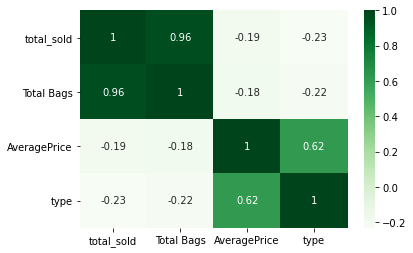

In [12]:
features = ['total_sold', 'Total Bags', 'AveragePrice', 'type']
data['type'] =data['type'].astype('category').cat.codes

sns.heatmap(data[features].corr(),cmap="Greens",annot=True)

# Q7

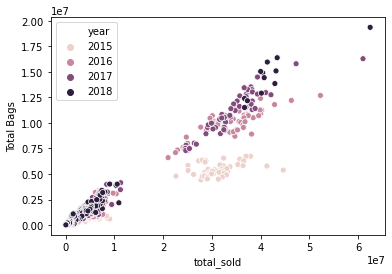

In [24]:
sns.scatterplot(x='total_sold', y='Total Bags',hue="year",sizes=(1, 8),data=data)

---
# GOOD LUCK !!!!
---